In [ ]:
#KO H01T02
#esikäsitellään US kongressidataa vuodelta 1984

In [2]:
import pandas as pd

#tehtävää palautettaessa nämä pitää ladata eikä hakea netistä!!!
#info löytyy: https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
#"C:\Users\janko\OneDrive\Työpöytä\repos\ttc8050 - koneoppiminen\koneoppiminen-tehtavat\harjoitukset\osa_1\house-votes-84.data"
#data = "house-votes-84.data"

#luodaan framet
df = pd.read_csv(url, header=None) #vaihda palautuksessa data:ksi

#attribute information
columns_1 = {0: "party",
            1: "handicapped-infants",
            2: "water-project-cost-sharing",
            3: "adoption-of-the-budget-resolution",
            4: "physician-fee-freeze",
            5: "el-salvador-aid",
            6: "religious-groups-in-schools",
            7: "anti-satellite-test-ban",
            8: "aid-to-nicaraguan-contras",
            9: "mx-missile",
            10: "immigration",
            11: "synfuels-corporation-cutback",
            12: "education-spending",
            13: "superfund-right-to-sue",
            14: "crime",
            15: "duty-free-exports",
            16: "export-administration-act-south-africa"}

#uudelleennimetään sarakkeet
df.rename(columns=columns_1, inplace=True)

#muutetaan vastaukset lukuarvoiksi
df.replace(to_replace='y', value=1, inplace=True)
df.replace(to_replace='n', value=-1, inplace=True)
df.replace(to_replace='?', value=0, inplace=True)
df.fillna(0) #lieneekö tarpeen

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,-1,-1,1,1,1,1,-1,-1,1,1,-1,1,1,1,-1,1
431,democrat,-1,-1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1
432,republican,-1,0,-1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,1
433,republican,-1,-1,-1,1,1,1,0,0,0,0,-1,1,1,1,-1,1


In [ ]:
#KO H01T03
#tehdään heatmap-kuvaaja äänestämisestä avainkysymyksissä

[Text(33.0, 0.5, 'congressman')]

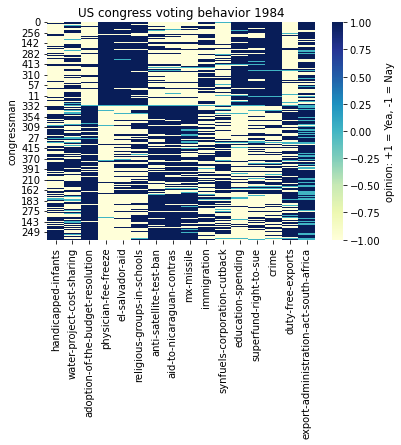

In [3]:
import seaborn as sns

#lajitellaan data aluksi puolueen mukaan (Rep ensin)
#ja dropataan luokkamuuttuja
df.sort_values('party', ascending=False, inplace=True)
df_ax = df.drop(columns=['party']).copy()

#tulostetaan heatmap
ax = sns.heatmap(df_ax, cmap='YlGnBu', cbar_kws={'label': 'opinion: +1 = Yea, -1 = Nay'})
ax.set(title='US congress voting behavior 1984')
ax.set(ylabel='congressman')

In [ ]:
#KO H01T04
#tiettyjen kongressiedustajien löytäminen
#käyttämällä kNN-menetelmää

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#aivan aluksi otetaan luokkamuuttuja erilleen aineistosta
X = df.drop(columns='party')
y = df['party']

#jaetaan data treenaus ja testisetteihin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #tarvitaanko random_state?

#fitataan kNN
#opetukseen otetaan pelkät arvot, muuten tulee warning
knn = KNeighborsClassifier(n_neighbors=5) #oletus 5
knn.fit(X_train.values, y_train.values)

#etsitään jees-mies
yes_man_search = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
yes_man_party = knn.predict(yes_man_search)[0]
yes_man_proba = knn.predict_proba(yes_man_search)[0]

#etsitään mysteerimies jonka hakuehto: [y,y,y,n,n,n,n,y,y,y,n,n,n,n,y,y]
mystery_man_search = [[1,1,1,-1,-1,-1,-1,1,1,1,-1,-1,-1,-1,1,1]]
mystery_man_party = knn.predict(mystery_man_search)[0]
mystery_man_proba = knn.predict_proba(mystery_man_search)[0]

#lopuksi etsitään kaikkea vastustanut nounou-mies
no_man_search = [[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]]
no_man_party = knn.predict(no_man_search)[0]
no_man_proba = knn.predict_proba(no_man_search)[0]

#näitä ei tule tehtävän palautukseen
print('jees-mies: ' + yes_man_party + str(yes_man_proba))
print('mysteerimies: ' + yes_man_party + str(mystery_man_proba))
print('nou-mies: ' + no_man_party + str(no_man_proba))

jees-mies: democrat[0.6 0.4]
mysteerimies: democrat[1. 0.]
nou-mies: republican[0.4 0.6]


C:\Users\janko\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\janko\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\janko\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\janko\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\janko\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\janko\anaconda3\lib\site-packages\sklearn\base.py:450: UserWa